In [1]:
from tensorflow.keras.datasets import cifar10

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data() 

170498071/170498071 [==============================] - 13126s 77us/step


In [3]:
(x_train y_train), (x_test, y_test) = cifar10.load_data()

2/2 [==============================] - 0s 76ms/step


2/2 [==============================] - 0s 110ms/step


2/2 [==============================] - 0s 76ms/step


2/2 [==============================] - 0s 60ms/step


2/2 [==============================] - 0s 63ms/step
Epoch 1/10, [D loss: 9.627866165828891e-05 | D accuracy: 10.0] [G loss: 0.0002789530553855002]
2/2 [==============================] - 0s 58ms/step


2/2 [==============================] - 0s 67ms/step


2/2 [==============================] - 0s 74ms/step


2/2 [==============================] - 0s 64ms/step


2/2 [==============================] - 0s 57ms/step


2/2 [==============================] - 0s 68ms/step
Epoch 2/10, [D loss: 4.5847034471080406e-06 | D accuracy: 10.0] [G loss: 2.6100038667209446e-05]
2/2 [==============================] - 0s 59ms/step


2/2 [==============================] - 0s 58ms/step


2/2 [==============================] - 0s 63ms/step


2/2 [==============================] - 0s 62ms/step


2/2 [==============================] - 0s 69ms/step


2/2 [==============================] - 0s 81ms/step
Epoch 3/10, [D loss: 1.5416073892993154e-06 | D accuracy: 10.0] [G loss: 1.6539377611479722e-05]
2/2 [==============================] - 0s 69ms/step


2/2 [==============================] - 0s 87ms/step


2/2 [==============================] - 0s 64ms/step


2/2 [==============================] - 0s 67ms/step


2/2 [==============================] - 0s 78ms/step


2/2 [==============================] - 0s 59ms/step
Epoch 4/10, [D loss: 4.352084062020367e-07 | D accuracy: 10.0] [G loss: 1.1543486834852956e-05]
2/2 [==============================] - 0s 68ms/step


2/2 [==============================] - 0s 64ms/step


2/2 [==============================] - 0s 74ms/step


2/2 [==============================] - 0s 68ms/step


2/2 [==============================] - 0s 73ms/step


2/2 [==============================] - 0s 65ms/step
Epoch 5/10, [D loss: 1.5230900629603639e-07 | D accuracy: 10.0] [G loss: 2.54486963058298e-06]
2/2 [==============================] - 0s 69ms/step


2/2 [==============================] - 0s 63ms/step


2/2 [==============================] - 0s 81ms/step


2/2 [==============================] - 0s 80ms/step


2/2 [==============================] - 0s 79ms/step


2/2 [==============================] - 0s 86ms/step
Epoch 6/10, [D loss: 3.018715410973982e-08 | D accuracy: 10.0] [G loss: 1.2044126833643531e-06]
2/2 [==============================] - 0s 91ms/step


2/2 [==============================] - 0s 98ms/step


2/2 [==============================] - 0s 99ms/step


2/2 [==============================] - 0s 95ms/step


2/2 [==============================] - 0s 94ms/step


2/2 [==============================] - 0s 96ms/step
Epoch 7/10, [D loss: 1.9125113936979687e-08 | D accuracy: 10.0] [G loss: 6.268555807764642e-07]
2/2 [==============================] - 0s 99ms/step


2/2 [==============================] - 0s 101ms/step


2/2 [==============================] - 0s 132ms/step


2/2 [==============================] - 0s 119ms/step


2/2 [==============================] - 0s 129ms/step


2/2 [==============================] - 0s 142ms/step
Epoch 8/10, [D loss: 4.553788679473314e-09 | D accuracy: 10.0] [G loss: 3.3620887052165926e-07]
2/2 [==============================] - 0s 137ms/step


2/2 [==============================] - 1s 286ms/step


2/2 [==============================] - 0s 91ms/step


2/2 [==============================] - 0s 97ms/step


2/2 [==============================] - 0s 123ms/step


2/2 [==============================] - 0s 146ms/step


2/2 [==============================] - 0s 137ms/step
Epoch 9/10, [D loss: 2.0849536541689417e-09 | D accuracy: 10.0] [G loss: 2.1633366031892365e-07]
2/2 [==============================] - 0s 174ms/step


2/2 [==============================] - 0s 136ms/step


2/2 [==============================] - 0s 145ms/step


2/2 [==============================] - 0s 120ms/step


2/2 [==============================] - 0s 161ms/step


2/2 [==============================] - 0s 134ms/step
Epoch 10/10, [D loss: 3.729708930588771e-09 | D accuracy: 10.0] [G loss: 1.5432490840794344e-07]
1/1 [==============================] - 0s 352ms/step


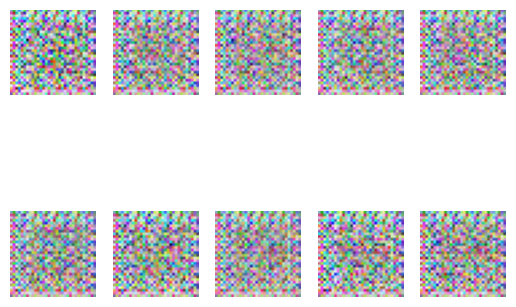

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(train_images, _), (_, _) = tf.keras.datasets.cifar10.load_data()
train_images = (train_images - 127.5) / 127.5  # Normalize to the range [-1, 1]

# Generator model
def build_generator(latent_dim):
    model = models.Sequential()
    model.add(layers.Dense(4 * 4 * 256, use_bias=False, input_dim=latent_dim))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Reshape((4, 4, 256)))

    model.add(layers.Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(alpha=0.2))

    model.add(layers.Conv2DTranspose(64, (4, 4), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(alpha=0.2))

    model.add(layers.Conv2DTranspose(3, (4, 4), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))

    return model

# Discriminator model
def build_discriminator(img_shape):
    model = models.Sequential()
    model.add(layers.Conv2D(64, (4, 4), strides=(2, 2), padding='same', input_shape=img_shape))
    model.add(layers.LeakyReLU(alpha=0.2))

    model.add(layers.Conv2D(128, (4, 4), strides=(2, 2), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(alpha=0.2))

    model.add(layers.Conv2D(256, (4, 4), strides=(2, 2), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(alpha=0.2))

    model.add(layers.Flatten())
    model.add(layers.Dense(1, activation='sigmoid'))

    return model

# Create and compile the discriminator
img_shape = (32, 32, 3)
discriminator = build_discriminator(img_shape)
discriminator.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5), metrics=['accuracy'])

# Create the generator
latent_dim = 10
generator = build_generator(latent_dim)

# Create the GAN
discriminator.trainable = False
gan_input = tf.keras.Input(shape=(latent_dim,))
fake_image = generator(gan_input)
gan_output = discriminator(fake_image)
gan = models.Model(gan_input, gan_output)
gan.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5))

# Training loop
def train_gan(epochs, batch_size):
    batch_count = train_images.shape[0] // batch_size

    for e in range(epochs):
        for _ in range(batch_count):
            noise = np.random.normal(0, 1, size=(batch_size, latent_dim))
            generated_images = generator.predict(noise)

            real_images = train_images[np.random.randint(0, train_images.shape[0], batch_size)]

            labels_real = np.ones((batch_size, 1))
            labels_fake = np.zeros((batch_size, 1))

            d_loss_real = discriminator.train_on_batch(real_images, labels_real)
            d_loss_fake = discriminator.train_on_batch(generated_images, labels_fake)

            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            noise = np.random.normal(0, 1, size=(batch_size, latent_dim))
            labels_gan = np.ones((batch_size, 1))
            g_loss = gan.train_on_batch(noise, labels_gan)

        print(f"Epoch {e+1}/{epochs}, [D loss: {d_loss[0]} | D accuracy: {10 * d_loss[1]}] [G loss: {g_loss}]")

# Train the GAN
train_gan(epochs=10, batch_size=64)

# Generate fake images
def generate_fake_images(samples=10):
    noise = np.random.normal(0, 1, size=(samples, latent_dim))
    generated_images = generator.predict(noise)
    
    generated_images = 0.5 * generated_images + 0.5  # Rescale to [0, 1]

    for i in range(samples):
        plt.subplot(2, 5, i+1)
        plt.imshow(generated_images[i])
        plt.axis('off')
    plt.show()

# Generate and visualize fake images
generate_fake_images()


In [4]:

from IPython.display import Image
%matplotlib inline

In [5]:
from numpy import asarray
from keras.models import Sequential
from keras.layers import UpSampling2D
#define input
x=asarray([[1,2],[3,4]])
print('Input Array:\n',x)
print()
#reshape
x=x.reshape((1,2,2,1))
print('After Reshape:\n',x,x.shape)
#define model
model=Sequential()
model.add(UpSampling2D(input_shape=(2,2,1)))
#summarize the model
model.summary()
ypred=model.predict(x)
ypred=ypred.reshape((4,4))
print('Upsampled Array:\n',ypred)

Input Array:
 [[1 2]
 [3 4]]

After Reshape:
 [[[[1]
   [2]]

  [[3]
   [4]]]] (1, 2, 2, 1)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 up_sampling2d (UpSampling2  (None, 4, 4, 1)           0         
 D)                                                              
                                                                 
Total params: 0 (0.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 0s 101ms/step
Upsampled Array:
 [[1. 1. 2. 2.]
 [1. 1. 2. 2.]
 [3. 3. 4. 4.]
 [3. 3. 4. 4.]]


In [6]:
from numpy import asarray
from keras.models import Sequential
from keras.layers import UpSampling2D
from keras.layers import Dense,Conv2D,Reshape
model=Sequential()
model.add(Dense(128*5*5,input_dim=100))
model.add(Reshape((5,5,128)))
model.add(UpSampling2D())
model.add(Conv2D(1,(3,3),padding='same'))
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 3200)              323200    
                                                                 
 reshape_1 (Reshape)         (None, 5, 5, 128)         0         
                                                                 
 up_sampling2d_1 (UpSamplin  (None, 10, 10, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 1)         1153      
                                                                 
Total params: 324353 (1.24 MB)
Trainable params: 324353 (1.24 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
from numpy import asarray
from keras.models import Sequential
from keras.layers import UpSampling2D
from keras.layers import Conv2DTranspose
x=asarray([[1,2],[3,4]])
print('Input Array:\n',x)
print()
#reshape
x=x.reshape((1,2,2,1))
print('After Reshape:\n',x,x.shape)
#define model
model=Sequential()
model.add(Conv2DTranspose(1,(1,1),strides=(2,2),input_shape=(2,2,1)))
#summarize the model
model.summary()
weights=[asarray([[[[1]]]]),asarray([0])]
model.set_weights(weights)
ypred=model.predict(x)
ypred=ypred.reshape((4,4))
print('Transposed Array:\n',ypred)

Input Array:
 [[1 2]
 [3 4]]

After Reshape:
 [[[[1]
   [2]]

  [[3]
   [4]]]] (1, 2, 2, 1)
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_transpose_3 (Conv2D  (None, 4, 4, 1)           2         
 Transpose)                                                      
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 0s 161ms/step
Transposed Array:
 [[1. 0. 2. 0.]
 [0. 0. 0. 0.]
 [3. 0. 4. 0.]
 [0. 0. 0. 0.]]


In [8]:
from keras.datasets.mnist import load_data
(xtrain,ytrain),(xtest,ytest)=load_data()
print('Train Shape:\t',xtrain.shape,ytrain.shape)
print()
print('Test Shape:\t',xtest.shape,ytest.shape)

Train Shape:	 (60000, 28, 28) (60000,)

Test Shape:	 (10000, 28, 28) (10000,)


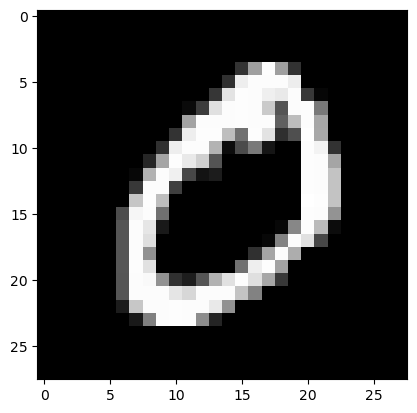

In [9]:
import matplotlib.pyplot as plt
plt.imshow(xtrain[1],cmap='gray')


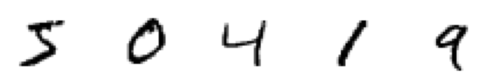

In [11]:

for i in range(5):
 plt.subplot(5,5,1+i)
 plt.axis('off')
 plt.imshow(xtrain[i],cmap='gray_r')
plt.show()

In [12]:

#Import all required libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D,Flatten,Dropout
from keras.layers import LeakyReLU
from keras.optimizers import Adam
from keras.utils import plot_model

In [15]:

#Import all required libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D,Flatten,Dropout
from keras.layers import LeakyReLU
from keras.optimizers import Adam
from keras.utils import plot_model

def discriminator(in_shape=(28,28,1)):
    model=Sequential()
    model.add(Conv2D(64,(3,3),strides=(2,2),padding='same',input_shape=in_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
    model.add(Conv2D(64,(3,3),strides=(2,2),padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(1,activation='sigmoid'))
    opt=Adam(learning_rate=0.0002,beta_1=0.5)
    model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])
    return model
model=discriminator()
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        640       
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 7, 7, 64)          0         
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 64)          0         
                                                                 
 flatten_1 (Flatten)         (None, 3136)             

In [21]:

def train_discriminator(model,dataset,n_iter=100,n_batch=256):
    half_batch=int(n_batch//22)
    for i in range(n_iter):
        xreal,yreal=generate_real_samples(dataset,half_batch)
    _,real_acc=model.train_on_batch(xreal,yreal)
    xfake,yfake=generate_fake_samples(half_batch)
    _,fake_acc=model.train_on_batch(xfake,yfake)
    print('>%d real=%.0f%% fake=%.0f%%'%(i+1,real_acc*100,fake_acc*100))
    xfake,yfake=generate_fake_samples(half_batch)
    _,fake_acc=model.train_on_batch(xfake,yfake)
    print('>%d real=%.0f%% fake=%.0f%%'%(i+1,real_acc*100,fake_acc*100))

In [23]:

from numpy import expand_dims,ones,zeros
def load_real_samples():
    (xtrain,_),(_,_)=load_data()
    x=expand_dims(xtrain,axis=-1)
    x=x.astype('float32')
    x=x/255.
    return x


In [24]:

model=discriminator()
#load image data
dataset=load_real_samples()

In [27]:
from numpy.random import rand,randint
def generate_real_samples(dataset,n_samples):
    ix=randint(0,dataset.shape[0],n_samples)
    x=dataset[ix]
    y=ones((n_samples,1))
    return x,y

In [28]:
generate_real_samples(load_real_samples(),n_samples=10)


(array([[[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         ...,
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]]],
 
 
        [[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
      

In [29]:
def generate_fake_samples(n_samples):
    x=rand(28*28*n_samples)
    x=x.reshape(n_samples,28,28,1)
    y=zeros((n_samples,1))
    return x,y


In [30]:
generate_fake_samples(10)


(array([[[[0.51383386],
          [0.89716297],
          [0.42564216],
          ...,
          [0.61479   ],
          [0.29301587],
          [0.43931159]],
 
         [[0.09157158],
          [0.42417287],
          [0.45706666],
          ...,
          [0.97455242],
          [0.93316271],
          [0.65400934]],
 
         [[0.04454342],
          [0.14841315],
          [0.82173291],
          ...,
          [0.54078987],
          [0.17983819],
          [0.57885853]],
 
         ...,
 
         [[0.47367352],
          [0.35845593],
          [0.17304055],
          ...,
          [0.8172742 ],
          [0.33826733],
          [0.5749433 ]],
 
         [[0.39622226],
          [0.13144369],
          [0.73207201],
          ...,
          [0.48556974],
          [0.51696477],
          [0.27538918]],
 
         [[0.18586419],
          [0.53186737],
          [0.00537632],
          ...,
          [0.24501611],
          [0.09646158],
          [0.91313042]]],
 
 
        [

In [31]:
train_discriminator(model,dataset)

>100 real=73% fake=64%
>100 real=73% fake=82%
